In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import yaml 
import joblib

In [76]:
with open('/myipond/config/config.yaml', 'r') as l :
    config = yaml.safe_load(l)
print(config)

{'data_raw': '/myipond/src/datafix.csv', 'data_encoded': '/myipond/src/datafix_encoded.csv', 'data_hari': '/myipond/src/datatanya_fix.csv', 'data_gat': '/myipond/src/datafix_gabungan.csv', 'datetime_cols': ['tanggal'], 'float_columns': ['tekanan_udara'], 'int_cols': ['hujan', 'kelembabpan', 'temperature', 'tingkat_cahaya'], 'target': 'keterangan', 'predictors': ['hujan', 'kelembabpan', 'tekanan_udara', 'temperature', 'tingkat_cahaya']}


# CLEANING

In [77]:
data = pd.read_csv(config['data_gat'])
data

,tanggal,ph,temperature,turbinity,label
0,2023-06-24 19:32:06,6.54,26.94,3,bersih
1,2023-06-24 19:32:12,6.59,26.94,3,bersih
2,2023-06-24 19:32:17,6.41,26.94,3,bersih
3,2023-06-24 19:32:23,6.51,26.94,3,bersih
4,2023-06-24 19:32:29,6.40,26.94,3,bersih
...,...,...,...,...,...
2415,2023-06-09 00:36:16,6.24,25.12,6,bersih
2416,2023-06-10 09:04:36,6.13,24.50,6,bersih
2417,2023-06-10 14:25:10,6.05,26.31,5,bersih
2418,2023-06-10 07:17:43,6.10,24.31,6,bersih


In [78]:
data = data.rename(columns={'encoded':'keterangan'})
data

,tanggal,ph,temperature,turbinity,label
0,2023-06-24 19:32:06,6.54,26.94,3,bersih
1,2023-06-24 19:32:12,6.59,26.94,3,bersih
2,2023-06-24 19:32:17,6.41,26.94,3,bersih
3,2023-06-24 19:32:23,6.51,26.94,3,bersih
4,2023-06-24 19:32:29,6.40,26.94,3,bersih
...,...,...,...,...,...
2415,2023-06-09 00:36:16,6.24,25.12,6,bersih
2416,2023-06-10 09:04:36,6.13,24.50,6,bersih
2417,2023-06-10 14:25:10,6.05,26.31,5,bersih
2418,2023-06-10 07:17:43,6.10,24.31,6,bersih


In [79]:
data.isnull().sum()

tanggal        0
ph             0
temperature    0
turbinity      0
label          0
dtype: int64

In [80]:
data.dtypes

tanggal         object
ph             float64
temperature    float64
turbinity        int64
label           object
dtype: object

In [81]:
data['tanggal'] = pd.to_datetime(data['tanggal'])

In [82]:
data = data.drop(['tanggal'],axis=1)
data

,ph,temperature,turbinity,label
0,6.54,26.94,3,bersih
1,6.59,26.94,3,bersih
2,6.41,26.94,3,bersih
3,6.51,26.94,3,bersih
4,6.40,26.94,3,bersih
...,...,...,...,...
2415,6.24,25.12,6,bersih
2416,6.13,24.50,6,bersih
2417,6.05,26.31,5,bersih
2418,6.10,24.31,6,bersih


In [83]:
data = data[~((data['ph'] < 6) | (data['ph'] > 8.5))]
data

,ph,temperature,turbinity,label
0,6.54,26.94,3,bersih
1,6.59,26.94,3,bersih
2,6.41,26.94,3,bersih
3,6.51,26.94,3,bersih
4,6.40,26.94,3,bersih
...,...,...,...,...
2415,6.24,25.12,6,bersih
2416,6.13,24.50,6,bersih
2417,6.05,26.31,5,bersih
2418,6.10,24.31,6,bersih


In [84]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['label'] = le.fit_transform(data['label'])
data

C:\Users\USER\AppData\Local\Temp\ipykernel_10288\3074870129.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = le.fit_transform(data['label'])


,ph,temperature,turbinity,label
0,6.54,26.94,3,0
1,6.59,26.94,3,0
2,6.41,26.94,3,0
3,6.51,26.94,3,0
4,6.40,26.94,3,0
...,...,...,...,...
2415,6.24,25.12,6,0
2416,6.13,24.50,6,0
2417,6.05,26.31,5,0
2418,6.10,24.31,6,0


<Axes: >

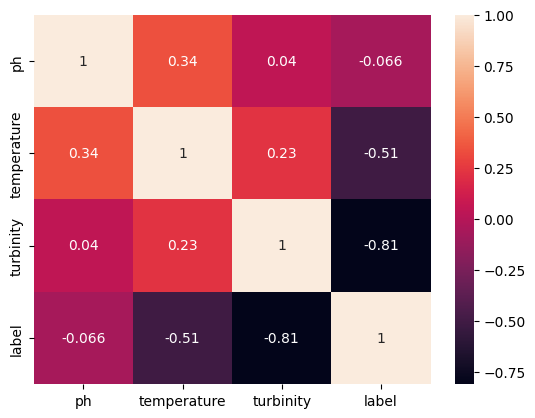

In [85]:
corr = data.corr()
sns.heatmap(corr,annot=True)

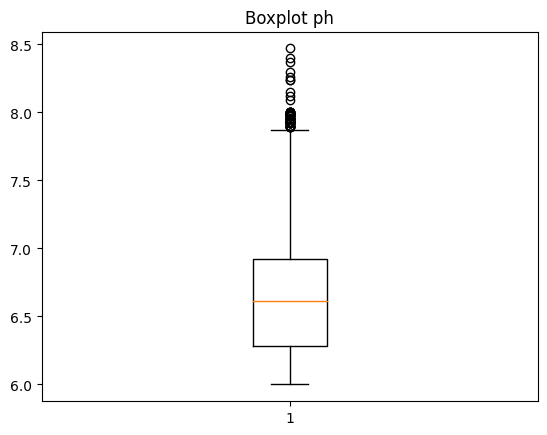

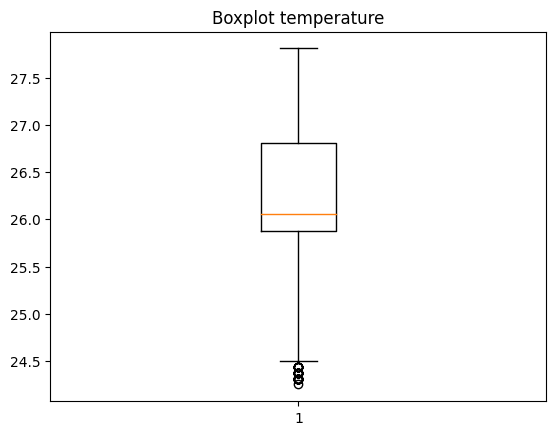

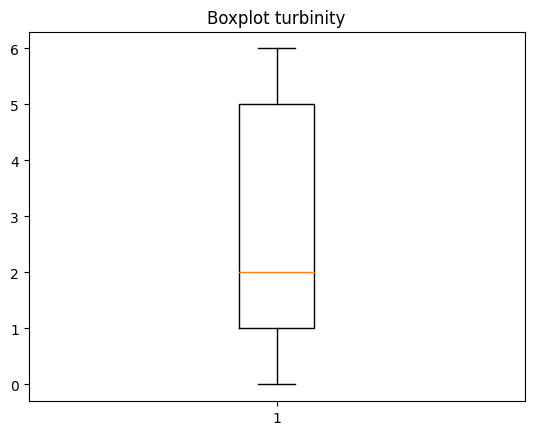

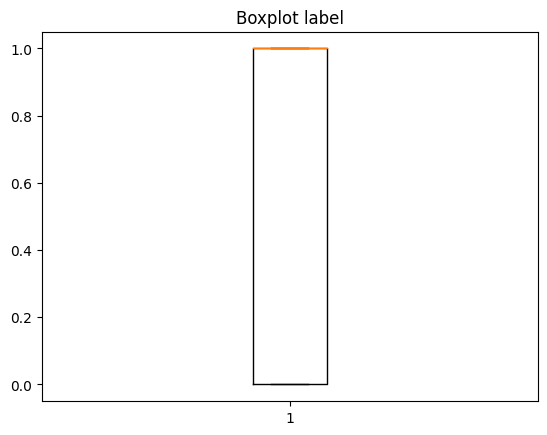

In [86]:
kolom = ['ph','temperature','turbinity','label']

for i in kolom:
    plt.boxplot(data[i])
    plt.title("Boxplot " + i)
    plt.show()

In [87]:
# Mencari nilai Q! dan Q3
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

# Menghitung IQR
IQR = Q3 - Q1

# Menentukan batas atas dan batas bawah (threshold) dengan menggunakan nilai IQR
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
kolom = ['ph','temperature']
# Menggunakan perulangan untuk membersihkan nilai outliers
for col in kolom:
    data = data[(data[col] >= lower_limit[col]) & (data[col] <= upper_limit[col])]

# Menampilkan data setelah nilai outliers dibersihkan
data

,ph,temperature,turbinity,label
0,6.54,26.94,3,0
1,6.59,26.94,3,0
2,6.41,26.94,3,0
3,6.51,26.94,3,0
4,6.40,26.94,3,0
...,...,...,...,...
2410,6.08,25.88,6,0
2412,6.02,24.75,6,0
2415,6.24,25.12,6,0
2416,6.13,24.50,6,0


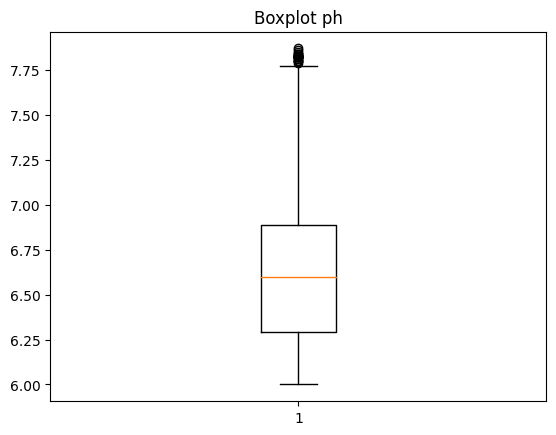

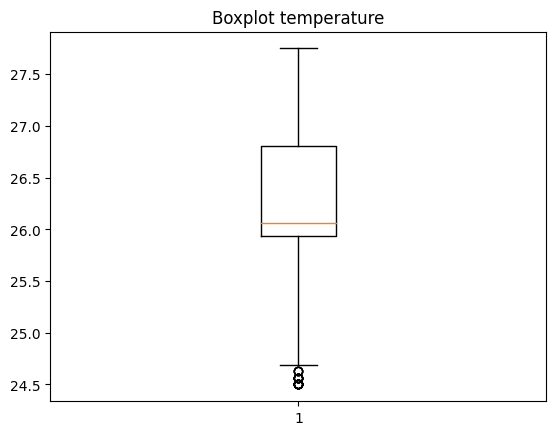

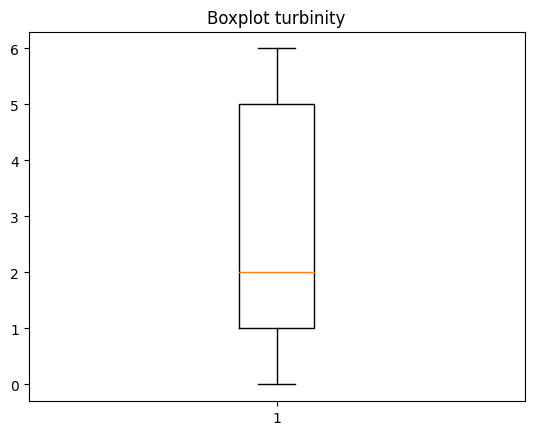

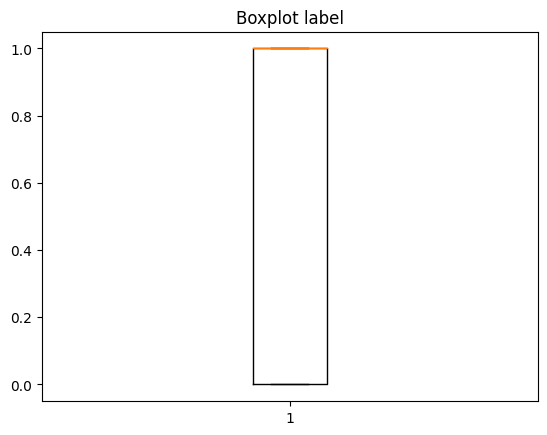

In [88]:
kolom = ['ph','temperature','turbinity','label']

for i in kolom:
    plt.boxplot(data[i])
    plt.title("Boxplot " + i)
    plt.show()

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load data
# Misalkan data yang digunakan tersimpan dalam variabel X dan target variabel y
X = data.drop(['label'],axis=1)
y = data['label']
# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat objek model Random Forest
rf = RandomForestClassifier()

# Melatih model pada data training
rf.fit(X_train, y_train)

# Memprediksi target variabel pada data testing
y_pred = rf.predict(X_test)

# Menampilkan laporan klasifikasi
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       223
           1       1.00      1.00      1.00       230

    accuracy                           1.00       453
   macro avg       1.00      1.00      1.00       453
weighted avg       1.00      1.00      1.00       453



In [90]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       223
           1       1.00      1.00      1.00       230

    accuracy                           1.00       453
   macro avg       1.00      1.00      1.00       453
weighted avg       1.00      1.00      1.00       453



In [91]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       223
           1       1.00      1.00      1.00       230

    accuracy                           1.00       453
   macro avg       1.00      1.00      1.00       453
weighted avg       1.00      1.00      1.00       453



In [92]:
joblib.dump(rf, '/myipond/modelss6.pkl')

['/myipond/modelss6.pkl']

In [93]:
# from sklearn.svm import SVC
# svc = SVC(kernel='linear')
# svc.fit(X_train, y_train)
# y_pred = svc.predict(X_test)
# print(classification_report(y_test, y_pred))